In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

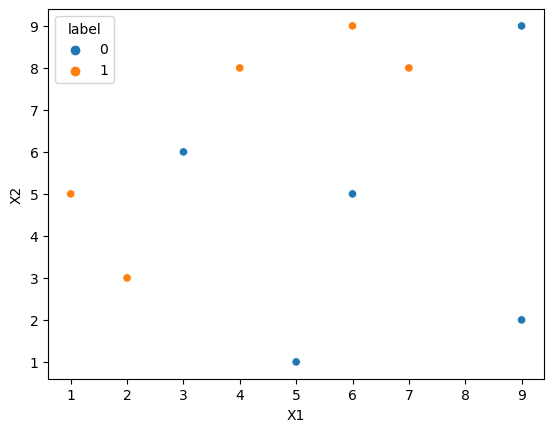

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

# Assign Weight:- wt = 1/n

In [7]:
df['weights'] = 1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


# Apply Decisiontree Algo & max_depth =1 

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [11]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

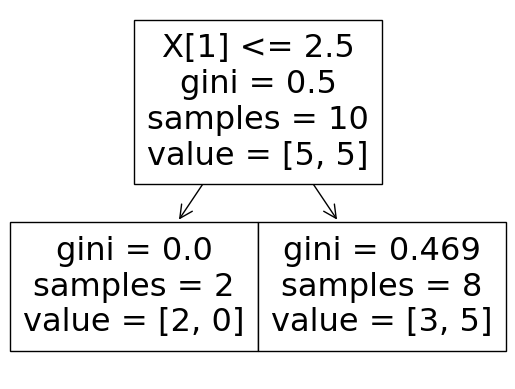

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

# Plot Decision Regions:-

<AxesSubplot:>

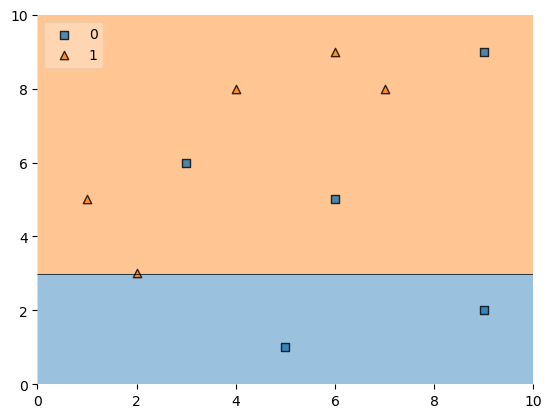

In [13]:
plot_decision_regions(X, y, clf=dt1, legend=2)

# Create A New Col New_Prediction:-

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


Error = wrong(y_pred) sum
Error = (0.1+0.1+0.1)
Error = 0.3

alpha = 1/2 log(1-error/error)
alpha = 1/2 log(1-0.3/0.3)
alpha = 0.42364893019360184

In [19]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [20]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

# Updated Weight:-

1)Missclassified(Wrong Prediction):-
    new_wt = curr_wt * e(power of alpha)
    
2)Correctclassified(Correct Prediction):-
    new_wt = curr_wt * e(-power of alpha)

In [22]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [23]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [24]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [25]:
df['updated_weights'].sum()

0.9165153319682015

updated_weights normalized:-
    normalized = updated_weight/(sum of updated_weight)

In [26]:
##Ex:- 
normalized = 0.065508/0.9165153319682015
normalized

0.07147507271844832

In [27]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [28]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [29]:
df['nomalized_weights'].sum()

1.0

# Create Range:-

In [30]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [31]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [32]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


# Create New Dataset:-

In [34]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [35]:
index_values = create_new_dataset(df)

In [36]:
index_values

[4, 8, 8, 3, 8, 8, 9, 2, 9, 9]

# Create New DataFrame Fot This Row Value For:- [4, 8, 8, 3, 8, 8, 9, 2, 9, 9]

In [37]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [38]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1


In [39]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [40]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [41]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 4.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

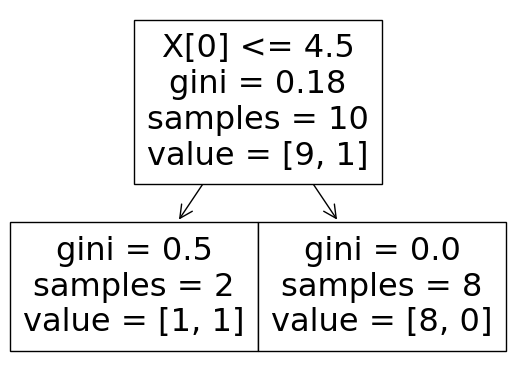

In [42]:
plot_tree(dt2)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

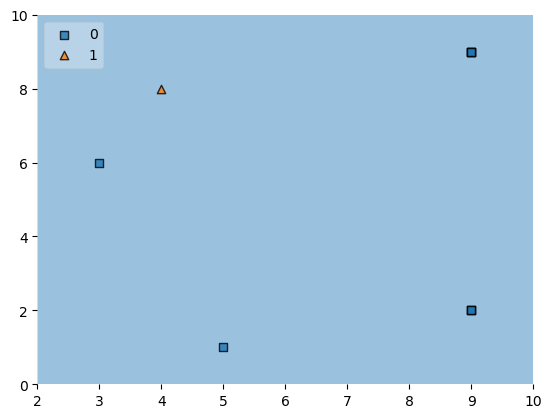

In [43]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [44]:
second_df['y_pred'] = dt2.predict(X)

In [45]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0


In [46]:
alpha2 = calculate_model_weight(0.1)

In [47]:
alpha2

1.0986122886681098

In [49]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [50]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [51]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,0,0.297427
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622


In [52]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [53]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,0,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034


In [54]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [55]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [56]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [57]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.056034,0.000000,0.056034
8,9,9,0,0.1,0,0.056034,0.056034,0.112068
8,9,9,0,0.1,0,0.056034,0.112068,0.168102
3,4,8,1,0.1,0,0.495694,0.168102,0.663796
8,9,9,0,0.1,0,0.056034,0.663796,0.719830
8,9,9,0,0.1,0,0.056034,0.719830,0.775864
9,9,2,0,0.1,0,0.056034,0.775864,0.831898
2,3,6,0,0.1,0,0.056034,0.831898,0.887932
9,9,2,0,0.1,0,0.056034,0.887932,0.943966
9,9,2,0,0.1,0,0.056034,0.943966,1.000000


In [58]:
index_values = create_new_dataset(second_df)

In [59]:
index_values

[3, 3, 3, 9, 3, 8, 8, 3, 3, 3]

In [60]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [61]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [62]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

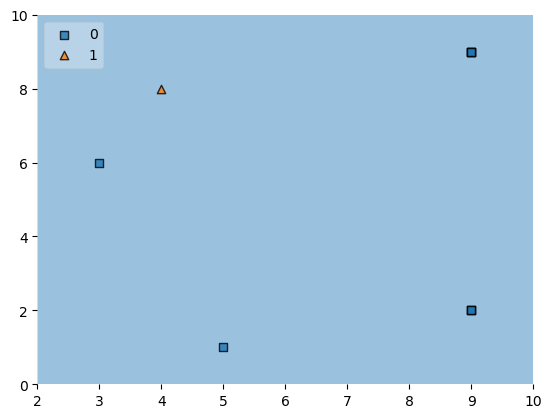

In [63]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [64]:
third_df['y_pred'] = dt3.predict(X)

In [68]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,0
3,4,8,1,0.1,0
3,4,8,1,0.1,0
9,9,2,0,0.1,0
3,4,8,1,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
3,4,8,1,0.1,0
3,4,8,1,0.1,0
3,4,8,1,0.1,0


In [66]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [67]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [69]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [70]:
dt2.predict(query)

array([0], dtype=int64)

In [71]:
dt3.predict(query)

array([0], dtype=int64)

In [77]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [79]:
np.sign(-0.25)

-1.0

In [80]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [81]:
dt2.predict(query)

array([0], dtype=int64)

In [82]:
dt3.predict(query)

array([0], dtype=int64)

In [83]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [84]:
np.sign(-0.25)

-1.0